<a href="https://colab.research.google.com/github/gusky14/CS215-Project-7---GK/blob/main/Vaidya%2C_Project_7_Working_with_Personal_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 7


Author/s: Gauri Vaidya

Date of Submission: 21st April 2025

For CS 215, Prof Brocks

I would like to acknowledge the use of Stack Overflow and the numerous resources available via Google insights and code examples as well as the Google Colab Python Helpdesk, which helped me resolve technical challenges that came up during this project. Additionally, I did refer to some of the modules in datacamp for formating and data parsing.


#Part 2 (Working on our own)

In [2]:
#Setting the working environment
import pandas as pd

from google.colab import files
uploaded = files.upload("/Users/gaurivaidya/Desktop/")

Saving timestamps_ytwatch.csv to /Users/gaurivaidya/Desktop/timestamps_ytwatch.csv


In [3]:
df = pd.read_csv("/Users/gaurivaidya/Desktop/timestamps_ytwatch.csv")

In [4]:
# Checking if it imported the right file
print(df.head())


                       Timestamp
0    Apr 1, 2025, 7:15:48 PM PDT
1    Apr 1, 2025, 4:15:26 PM PDT
2  Mar 31, 2025, 11:09:14 AM PDT
3   Mar 29, 2025, 7:12:27 PM PDT
4   Mar 29, 2025, 7:11:27 PM PDT


In [12]:
# Importing matplotlib for later
# Checking Column Names

import matplotlib.pyplot as plt
print("Columns:", df.columns.tolist())





Columns: ['Timestamp']


In [13]:
# 1. Making sure timestamp column is in datetime format and chronological
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)


Streaming output truncated to the last 5000 lines.
<ipython-input-13-c7346b494589>:1: FutureWarning: Parsed string "Feb 27, 2021, 1:02:23 AM PDT" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
<ipython-input-13-c7346b494589>:1: FutureWarning: Parsed string "Feb 27, 2021, 12:40:10 AM PDT" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
<ipython-input-13-c7346b494589>:1: FutureWarning: Parsed string "Feb 27, 2021, 12:27:05 AM PDT" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a fu

In [14]:
# 3. Computing time since the previous event
df['time_since_prev'] = df['Timestamp'].diff()

In [15]:
# 4. Longest and average interval
longest = df['time_since_prev'].max()
average = df['time_since_prev'].mean()
print(f"Longest interval between events: {longest}")
print(f"Average interval between events: {average}")


Longest interval between events: 12 days 02:54:59
Average interval between events: 0 days 01:06:12.935056599


In [16]:
# 5. Day with the most timestamps
df['date'] = df['Timestamp'].dt.date
day_counts = df['date'].value_counts()
top_day, top_day_count = day_counts.idxmax(), day_counts.max()
print(f"Day with most events: {top_day} ({top_day_count} events)")


Day with most events: 2025-03-19 (351 events)


In [17]:
# 6. Month with the most timestamps
df['month'] = df['Timestamp'].dt.to_period('M')
month_counts = df['month'].value_counts()
top_month, top_month_count = month_counts.idxmax(), month_counts.max()
print(f"Month with most events: {top_month} ({top_month_count} events)")


Month with most events: 2024-03 (2151 events)


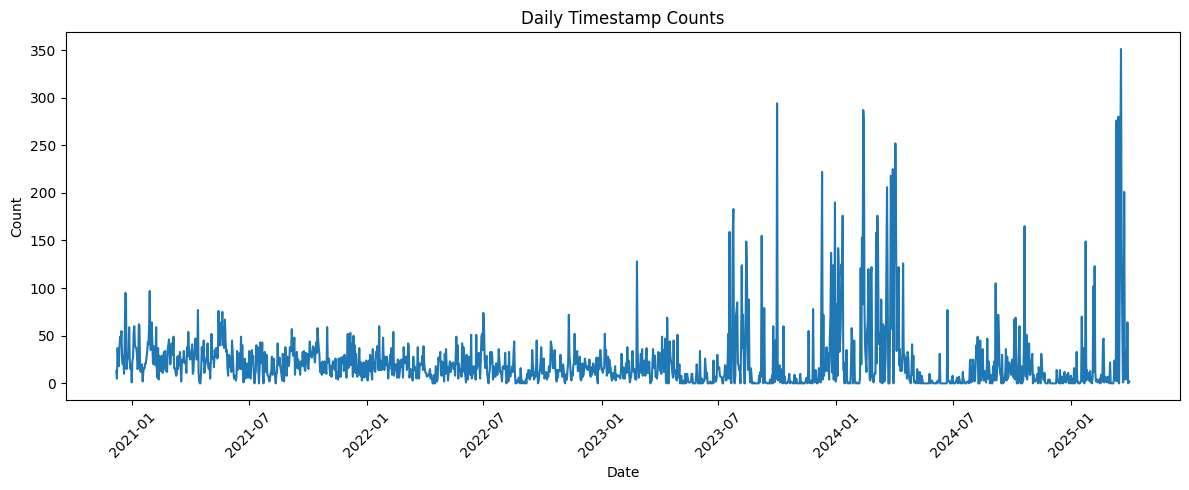

In [19]:
# 7. Visualization: daily counts over time
daily_counts = df.set_index('Timestamp').resample('D').size()
plt.figure(figsize=(12,5))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Daily Timestamp Counts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Part 4

month
1      738.60
2      772.80
3     1193.00
4      645.40
5      490.25
6      378.00
7      583.50
8      547.25
9      540.75
10     652.50
11     357.00
12     666.20
Name: count, dtype: float64


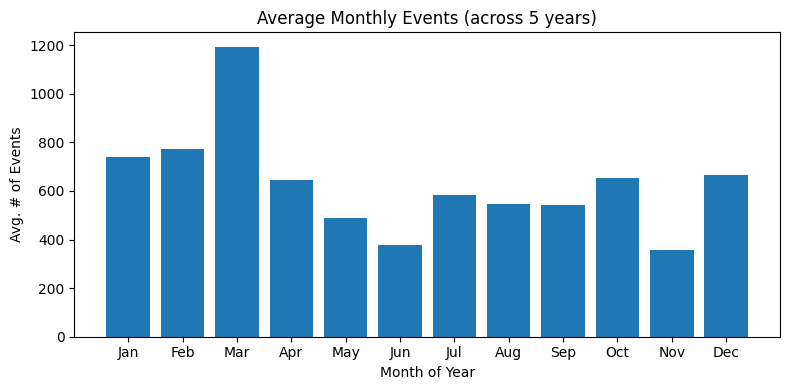

In [28]:
# Month‐of‐year view ( average for each month over 5 years)

df['year']  = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month

monthly_counts = (
    df
    .groupby(['year','month'])
    .size()
    .reset_index(name='count')
)

monthly_avg = (
    monthly_counts
    .groupby('month')['count']
    .mean()
    .reindex(range(1,13))
)

print(monthly_avg)


plt.figure(figsize=(8,4))
plt.bar(
    monthly_avg.index,
    monthly_avg.values,
    tick_label=[
        'Jan','Feb','Mar','Apr','May','Jun',
        'Jul','Aug','Sep','Oct','Nov','Dec'
    ]
)
plt.xlabel('Month of Year')
plt.ylabel('Avg. # of Events')
plt.title('Average Monthly Events (across 5 years)')
plt.tight_layout()
plt.show()


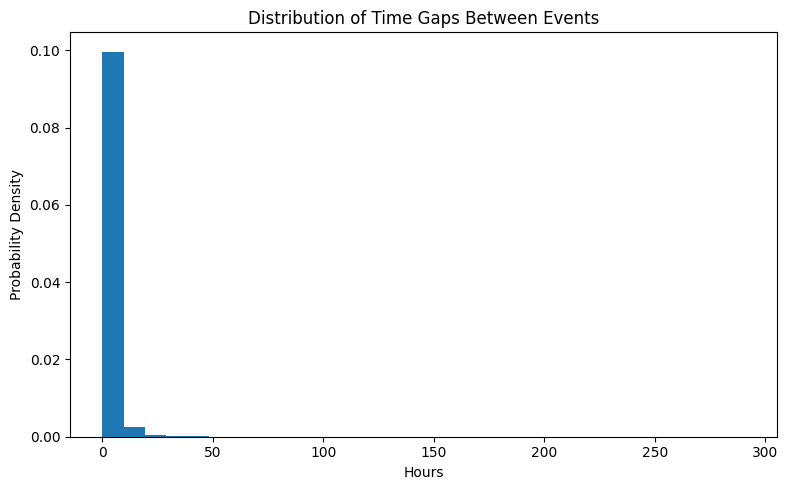

In [24]:
# Histogram of time‐gaps (in hours) converted to hours
plt.figure(figsize=(8,5))
gaps_in_hours = df['time_since_prev'].dt.total_seconds() / 3600

# pass density=True instead of relying on counts
plt.hist(gaps_in_hours, bins=30, density=True)

plt.title('Distribution of Time Gaps Between Events')
plt.xlabel('Hours')
plt.ylabel('Probability Density')     # relabel the axis
plt.tight_layout()
plt.show()

In [26]:
# Exporting for the shared thing
# Part 9: Splitting out components into a new DataFrame
df_sep = pd.DataFrame({
    'year':   df['Timestamp'].dt.year,
    'month':  df['Timestamp'].dt.month,
    'day':    df['Timestamp'].dt.day,
    'hour':   df['Timestamp'].dt.hour,
    'date':   df['Timestamp'].dt.date
})

df_sep['weekday'] = df['Timestamp'].dt.day_name()

print(df_sep.head())

df_sep.to_csv('separated_timestamps.csv', index=False)

from google.colab import files
files.download('separated_timestamps.csv')


   year  month  day  hour        date weekday
0  2020     12    7    16  2020-12-07  Monday
1  2020     12    7    16  2020-12-07  Monday
2  2020     12    7    16  2020-12-07  Monday
3  2020     12    7    16  2020-12-07  Monday
4  2020     12    7    16  2020-12-07  Monday


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>